<a href="https://colab.research.google.com/github/AnnmariyaFrancis/ICT-Assignments/blob/main/Ann_Mariya_Francis_pca_kmeansNCI60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
data=pd.read_csv("/content/NCI60_X (1).csv", index_col = 0)

In [37]:
data.head(3)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-0.070000,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000


In [38]:
data.tail(3)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V62,0.21,-0.62,-0.15,-1.33,0.045,-4.000000e-01,-0.39,-0.675,-0.36,0.945020,...,-0.16002,-0.12,0.85,-0.125,0.779980,0.39,0.00000,0.16,2.03,3.94
V63,-0.05,0.14,-0.09,-1.26,0.045,-2.710000e-20,0.42,-0.305,0.31,0.065019,...,0.88998,-0.42,-0.46,-0.855,-0.160020,-0.35,-0.36001,-0.49,0.01,-1.72
V64,0.35,-0.27,0.02,-1.23,-0.715,-3.400000e-01,-0.52,0.475,0.23,0.915019,...,1.62998,3.00,2.86,2.145,0.869981,0.48,0.96999,0.29,-0.15,1.21


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [40]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


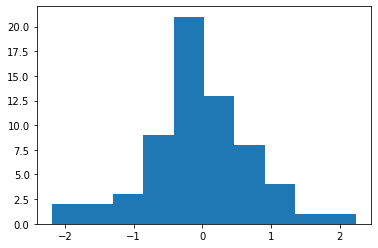

In [41]:
plt.hist(data['2'])
plt.show()

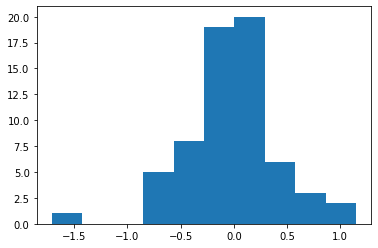

In [42]:
plt.hist(data['3'])
plt.show()

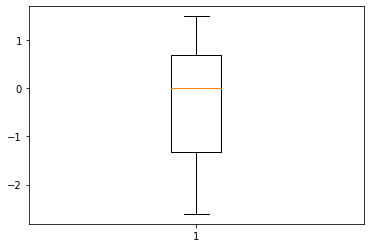

In [43]:
plt.boxplot(data['4'])
plt.show()

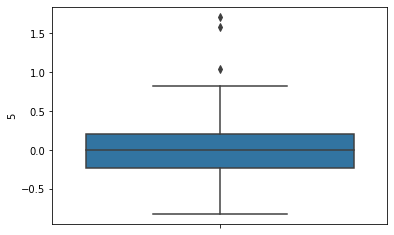

In [44]:
sns.boxplot(y = data['5'])
plt.show()

In [47]:
data.isna().sum()

1       0
2       0
3       0
4       0
5       0
       ..
6826    0
6827    0
6828    0
6829    0
6830    0
Length: 6830, dtype: int64

In [48]:
x = data

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmean_inst = KMeans(n_clusters=6)

In [51]:
kmean_inst.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [52]:
kmean_inst.inertia_

182324.52231247607

In [53]:
kmean_inst.cluster_centers_

array([[ 0.10392718,  0.05607004,  0.01160575, ..., -0.13982282,
        -0.10267996, -0.61982282],
       [-0.05332683, -0.46332667,  0.07000651, ..., -1.27332683,
        -0.05666017,  0.        ],
       [-0.39333333, -0.32      , -0.73666667, ..., -0.51666667,
         0.01333333, -0.88666667],
       [-0.01000217, -0.09000217,  0.05110894, ..., -0.55666883,
         0.08444228,  0.37666444],
       [-0.21294232, -0.06529412, -0.12882468, ...,  0.24470474,
         0.43176356,  1.08352829],
       [ 0.23      ,  0.23      ,  0.5325    , ...,  0.505     ,
         0.80499988,  1.8475    ]])

In [54]:
kmean_inst.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 4, 1, 1, 1, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [58]:
from sklearn.decomposition import PCA

In [59]:
pc = PCA()

In [60]:
pc_arr = pc.fit_transform(data)

In [61]:
pc_arr.shape

(64, 64)

In [62]:
pc_data = pd.DataFrame(pc_arr)

In [63]:
(pc.explained_variance_ratio_ * 100).round(1)

array([14.9,  8.3,  6.6,  4.3,  3.8,  3.5,  2.9,  2.8,  2.6,  2.2,  2.1,
        2. ,  1.8,  1.8,  1.7,  1.6,  1.6,  1.5,  1.4,  1.4,  1.4,  1.3,
        1.3,  1.2,  1.2,  1.1,  1.1,  1. ,  1. ,  1. ,  1. ,  0.9,  0.9,
        0.9,  0.8,  0.8,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.4,
        0.4,  0.4,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0. ])

In [64]:
pc_data.corr().round()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
1,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
2,0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
3,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
4,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0
60,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0
62,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0


In [66]:
x=pc_data

In [67]:
kmean_inst.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [69]:
kmean_inst.inertia_


185909.9030353978

In [70]:
kmean_inst.cluster_centers_


array([[-2.05453304e+01, -1.14524438e+01, -1.68497706e+00,
        -7.11998856e+00,  2.82621291e+00, -1.22135146e+00,
         1.17249203e+01,  1.64929056e+00, -3.01213413e+00,
         6.82254179e-01, -1.13998237e+00, -1.51497998e+00,
        -1.04161732e+00, -3.76559090e+00, -6.09919519e-02,
        -5.02490300e-02,  1.44292433e+00,  5.69579153e-02,
        -8.09374772e-02, -1.60649697e+00, -3.19045929e-01,
        -2.04635323e+00, -1.88271467e+00, -1.83182680e+00,
         7.38800052e-02,  2.07484012e+00, -2.54375891e-01,
         1.15816935e+00, -1.99235462e+00,  1.19676368e+00,
         5.85092019e-01,  1.42031574e-01,  1.42322045e+00,
         1.81136803e-01,  1.79682206e-01, -2.90208452e-01,
        -4.33336562e-01,  1.50983109e+00, -2.44598144e-01,
         4.06296910e-01, -1.88451448e+00, -4.07419190e-01,
        -5.14310829e-02,  7.91229680e-01,  9.02076019e-01,
        -4.09274739e-01,  8.92255679e-01, -3.30590221e-01,
         1.00094404e+00, -7.04319895e-01, -2.75512591e-0

In [71]:
kmean_inst.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 5,
       5, 5, 5, 0, 5, 5, 5, 5, 0, 0, 0, 5, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)